In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df=pd.DataFrame(data=iris.target)
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [8]:
df.dtypes

0    int32
dtype: object

In [9]:
ds=pd.DataFrame(data=iris.data)
print(ds.dtypes)
ds

0    float64
1    float64
2    float64
3    float64
dtype: object


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
ds.skew()

0    0.314911
1    0.318966
2   -0.274884
3   -0.102967
dtype: float64

# VISUALIZATION

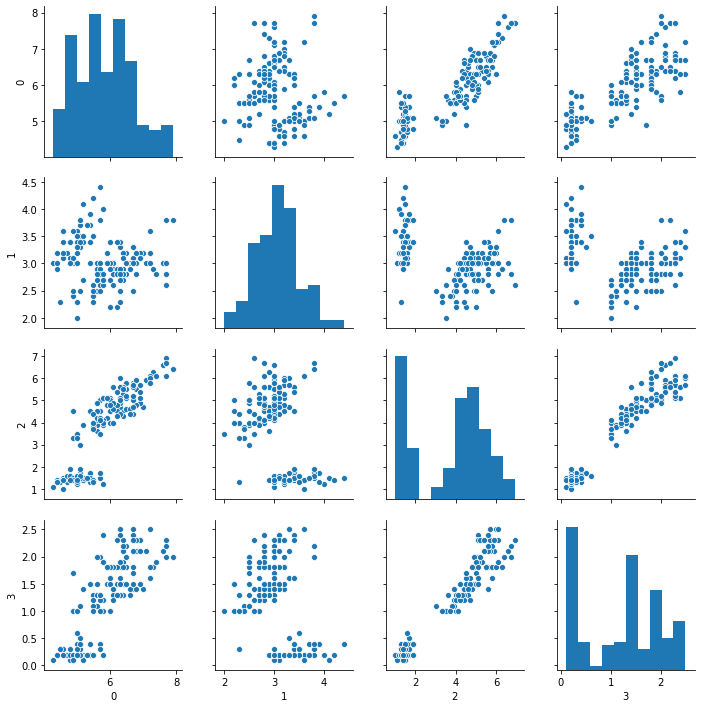

In [11]:
sb.pairplot(ds)

In [12]:
ds.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

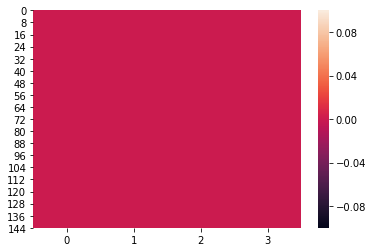

In [13]:
sb.heatmap(ds.isnull())

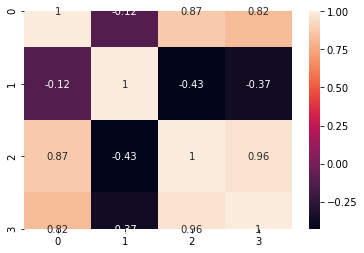

In [14]:
sb.heatmap(ds.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029EE3D82808>,
      dtype=object)

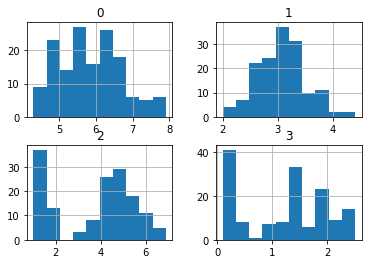

In [15]:
ds.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029EE41D6B88>,
      dtype=object)

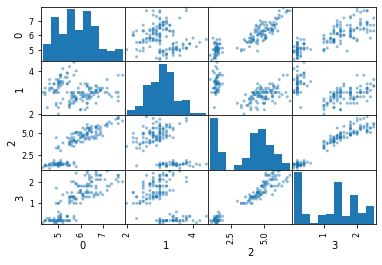

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(ds)

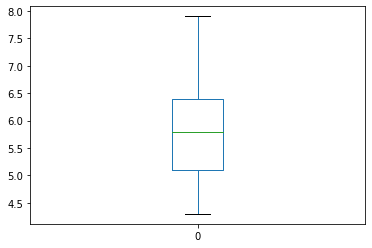

In [17]:
ds[0].plot.box()

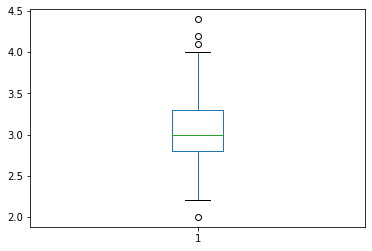

In [18]:
ds[1].plot.box()

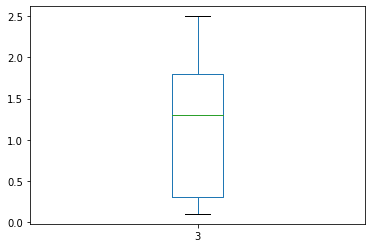

In [19]:
ds[3].plot.box()

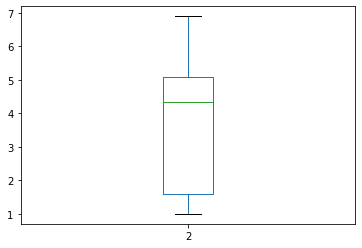

In [20]:
ds[2].plot.box()

# SPLITTING DATA INTO X AN Y

In [21]:
x=iris.data
y=iris.target

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=44)

In [23]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [24]:
# Classification Accuracy

In [25]:
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, x, y, scoring=scoring)
print("Accuracy")
print(results.mean())
print(results.std())

Accuracy
0.9468954248366014
0.017936681699428268


In [26]:
#Log loss
model = LogisticRegression()
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, x, y, scoring=scoring)
print("LogLoss")
print(results.mean())
print(results.std())

LogLoss
-0.34459161729856264
0.010260385240373093


In [27]:
#Classification report, Confusion matrix,accuracy_score

In [28]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

1.0
[[10  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Regression Metrics

In this section will review 3 of the most common metrics for evaluating predictions on regression machine learning problems:

Mean Absolute Error

Mean Squared Error

R^2

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.9294064002196083

In [31]:
lm.coef_

array([ 0.01764727, -0.11789523,  0.14166864,  0.66807721])

In [32]:
lm.intercept_

-0.08326467445376584

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
print('Error')
print(mean_squared_error(y_test,predlg))

Error
0.0


In [35]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predlg))

1.0


# SAVE THE BEST FIT MODEL

In [36]:
from sklearn.externals import joblib
joblib.dump(lg,"iris_data")
lg_from_joblib=joblib.load("iris_data")
lg_from_joblib.predict(x_test)

array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1])